In [ ]:
import timeit

In [ ]:
%matplotlib inline
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('Zillow Data.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,ï»¿RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20
0,77207,10323,44502,Zip,OH,OH,Youngstown,Youngstown-Warren-Boardman,Mahoning County,11209.0,...,17888,18406,18862,19176,19554,19888,20313,20572,20821,21178
1,89222,30742,71839,Zip,AR,AR,Garland,Texarkana,Miller County,15746.0,...,21021,21120,21245,21538,21666,21700,21598,21590,21514,21485
2,63200,31386,13639,Zip,NY,NY,Town Of Fine,Ogdensburg-Massena,Saint Lawrence County,23529.0,...,42283,42336,42611,42798,42994,43057,43471,43832,44111,44222
3,76354,21359,42410,Zip,KY,KY,Earlington,Madisonville,Hopkins County,14205.0,...,27760,27800,27865,27972,28047,28113,28078,28008,27840,27657
4,76033,13724,41522,Zip,KY,KY,Elkhorn City,NaN,Pike County,18425.0,...,38467,38623,38703,38648,38624,38748,38927,39053,38893,38750


In [ ]:
df = df.rename(index=str, columns={"ï»¿RegionID": "RegionID"})
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20
0,77207,10323,44502,Zip,OH,OH,Youngstown,Youngstown-Warren-Boardman,Mahoning County,11209.0,...,17888,18406,18862,19176,19554,19888,20313,20572,20821,21178
1,89222,30742,71839,Zip,AR,AR,Garland,Texarkana,Miller County,15746.0,...,21021,21120,21245,21538,21666,21700,21598,21590,21514,21485
2,63200,31386,13639,Zip,NY,NY,Town Of Fine,Ogdensburg-Massena,Saint Lawrence County,23529.0,...,42283,42336,42611,42798,42994,43057,43471,43832,44111,44222
3,76354,21359,42410,Zip,KY,KY,Earlington,Madisonville,Hopkins County,14205.0,...,27760,27800,27865,27972,28047,28113,28078,28008,27840,27657
4,76033,13724,41522,Zip,KY,KY,Elkhorn City,NaN,Pike County,18425.0,...,38467,38623,38703,38648,38624,38748,38927,39053,38893,38750


In [ ]:
arkansasDF = df.loc[df['City'].isin(['Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy']) & df['State'].isin(['AR'])]

In [ ]:
arkansasDF

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20
1185,89444,4706,72206,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,50684.0,...,76545,77177,77514,77462,77606,78029,78454,78679,78858,79523
1197,89442,2628,72204,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,55572.0,...,72297,72162,72250,72332,72976,73492,74355,75124,76106,76895
1266,89446,3203,72209,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,56903.0,...,73613,73328,72997,72800,73261,73445,73738,73768,74577,75424
1685,89348,25877,72068,Zip,AR,AR,Searcy,Searcy,White County,55702.0,...,74266,74387,74092,73889,73709,73507,72935,72487,72360,72460
1947,89244,2887,71901,Zip,AR,AR,Hot Springs,Hot Springs,Garland County,62223.0,...,122540,122765,123312,124166,125133,125741,126252,126854,128023,129745
2588,89440,7547,72202,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,73133.0,...,93449,94187,94839,95208,95986,96672,97247,97737,98556,99905
3448,89371,7980,72103,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,86661.0,...,123866,124062,124381,124588,124780,124858,124787,124611,124476,124672
3592,89409,2461,72143,Zip,AR,AR,Searcy,Searcy,White County,85512.0,...,142660,142838,142174,141541,140831,140000,138321,137024,136435,136386
4236,89443,3580,72205,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,97658.0,...,161874,161802,162126,162230,162291,162159,162329,162577,163100,164072
5066,89249,332,71913,Zip,AR,AR,Hot Springs,Hot Springs,Garland County,96315.0,...,158061,158528,159213,160118,161110,161806,162347,163134,164485,166238


In [ ]:
dates = []
for i in arkansasDF.columns:
  dates.append(i)

dates = dates[9:]
print(dates)



['1/31/00', '2/29/00', '3/31/00', '4/30/00', '5/31/00', '6/30/00', '7/31/00', '8/31/00', '9/30/00', '10/31/00', '11/30/00', '12/31/00', '1/31/01', '2/28/01', '3/31/01', '4/30/01', '5/31/01', '6/30/01', '7/31/01', '8/31/01', '9/30/01', '10/31/01', '11/30/01', '12/31/01', '1/31/02', '2/28/02', '3/31/02', '4/30/02', '5/31/02', '6/30/02', '7/31/02', '8/31/02', '9/30/02', '10/31/02', '11/30/02', '12/31/02', '1/31/03', '2/28/03', '3/31/03', '4/30/03', '5/31/03', '6/30/03', '7/31/03', '8/31/03', '9/30/03', '10/31/03', '11/30/03', '12/31/03', '1/31/04', '2/29/04', '3/31/04', '4/30/04', '5/31/04', '6/30/04', '7/31/04', '8/31/04', '9/30/04', '10/31/04', '11/30/04', '12/31/04', '1/31/05', '2/28/05', '3/31/05', '4/30/05', '5/31/05', '6/30/05', '7/31/05', '8/31/05', '9/30/05', '10/31/05', '11/30/05', '12/31/05', '1/31/06', '2/28/06', '3/31/06', '4/30/06', '5/31/06', '6/30/06', '7/31/06', '8/31/06', '9/30/06', '10/31/06', '11/30/06', '12/31/06', '1/31/07', '2/28/07', '3/31/07', '4/30/07', '5/31/07',

In [ ]:
arkansasDF.describe()

,RegionID,SizeRank,RegionName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,...,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,89456.157895,5633.315789,72239.578947,107523.368421,108023.684211,108436.315789,109083.157895,109720.947368,110162.578947,110579.526316,...,171655.789474,171735.947368,172060.526316,172381.263158,172764.684211,172901.842105,172942.263158,173024.315789,173389.473684,174138.684211
std,129.444653,5574.407214,227.541038,49978.665060,50446.984060,50578.414601,50757.134294,50961.889786,51042.292486,51288.041713,...,80451.163319,80258.321780,80470.361180,80723.768439,80808.608250,80729.543366,80570.525882,80449.066752,80302.964553,80350.640175
min,89244.000000,332.000000,71901.000000,50684.000000,50799.000000,51087.000000,51152.000000,51700.000000,52045.000000,52308.000000,...,72297.000000,72162.000000,72250.000000,72332.000000,72976.000000,73445.000000,72935.000000,72487.000000,72360.000000,72460.000000
25%,89424.500000,2757.500000,72172.500000,67678.000000,67520.000000,68187.000000,69342.500000,70237.500000,70416.000000,69967.500000,...,107994.500000,108476.000000,109075.500000,109687.000000,110383.000000,110765.000000,111017.000000,111174.000000,111516.000000,112288.500000
50%,89445.000000,3857.000000,72207.000000,97658.000000,98280.000000,98497.000000,98798.000000,99481.000000,100163.000000,100647.000000,...,161874.000000,161802.000000,162126.000000,162230.000000,162291.000000,162159.000000,162347.000000,163134.000000,164485.000000,166238.000000
75%,89453.000000,7763.500000,72217.500000,127373.500000,128152.500000,128911.500000,129813.000000,130334.000000,130981.500000,131895.500000,...,218970.000000,219571.500000,220167.000000,220798.000000,221238.500000,221167.500000,221158.000000,221355.000000,221689.000000,221628.500000
max,89710.000000,25877.000000,72704.000000,243901.000000,245583.000000,246144.000000,247215.000000,248406.000000,248692.000000,249467.000000,...,336275.000000,335464.000000,336080.000000,336936.000000,337712.000000,338084.000000,337914.000000,337705.000000,337720.000000,338871.000000


In [ ]:
arDF = pd.read_csv('arkansas table.csv')

In [ ]:
arDF

,Dates,Hot Springs 1,Hot Springs 2,Little Rock 1,Little Rock 2,Little Rock 3,Little Rock 4,Little Rock 5,Little Rock 6,Little Rock 7,Little Rock 8,Little Rock 9,Little Rock 10,Little Rock 11,Little Rock 12,Searcy 1,Searcy 2,Fayetteville 1,Fayetteville 2,Fayetteville 3
0,1/31/00,96315,62223,50684,55572,56903,73133,86661,97658,120441,131960,137635,158396,186773,243901,55702,85512,107217,113471,122787
1,2/29/00,96767,62575,50799,55559,57193,72465,86811,98280,120986,132734,138214,159234,188455,245583,55971,85584,107618,114051,123571
2,3/31/00,97553,62847,51087,55698,57297,73527,86870,98497,121172,132712,138406,159423,189321,246144,55580,85830,108128,115087,125111
3,4/30/00,98516,63484,51152,56096,57446,75201,87061,98798,121727,132970,138988,159891,190431,247215,55863,86233,108986,115866,126656
4,5/31/00,99481,64056,51700,56413,57766,76419,87190,99301,122478,133208,139669,161072,191578,248406,56363,86478,109547,116113,127460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,11/30/19,161806,125741,78029,73492,73445,96672,124858,162159,181199,190161,193897,302024,285440,338084,73507,140000,227829,214506,242286
239,12/31/19,162347,126252,78454,74355,73738,97247,124787,162329,181813,190193,193897,301384,285216,337914,72935,138321,228159,214157,242405
240,1/31/20,163134,126854,78679,75124,73768,97737,124611,162577,182397,190350,193951,300589,285048,337705,72487,137024,228725,213985,242717
241,2/29/20,164485,128023,78858,76106,74577,98556,124476,163100,182941,190541,194172,300816,284712,337720,72360,136435,229374,214004,243144


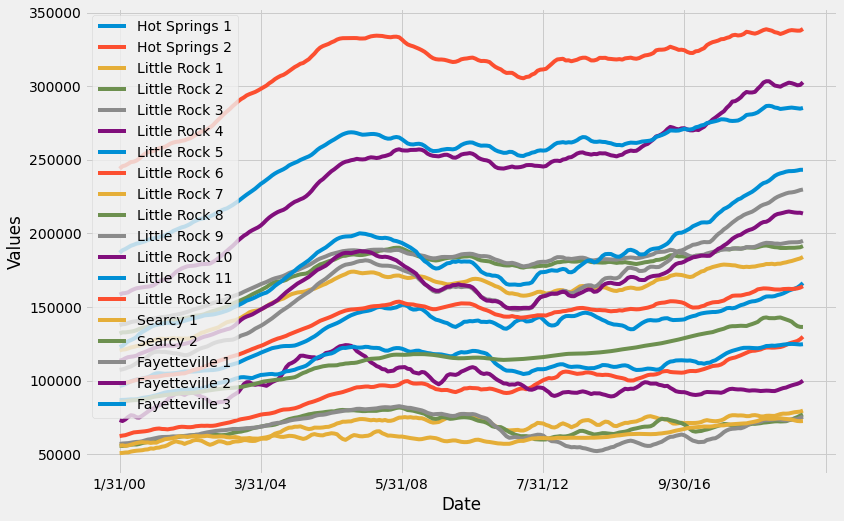

In [ ]:
ax = arDF.set_index('Dates').plot(figsize=(12, 8))
ax.set_ylabel('Values')
ax.set_xlabel('Date')

plt.show()

In [ ]:
arDF.describe()

,Hot Springs 1,Hot Springs 2,Little Rock 1,Little Rock 2,Little Rock 3,Little Rock 4,Little Rock 5,Little Rock 6,Little Rock 7,Little Rock 8,Little Rock 9,Little Rock 10,Little Rock 11,Little Rock 12,Searcy 1,Searcy 2,Fayetteville 1,Fayetteville 2,Fayetteville 3
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,134879.506173,93887.843621,68691.427984,69268.600823,67395.185185,97610.358025,110438.275720,140294.806584,160265.436214,174411.444444,177073.374486,240785.539095,252087.012346,311472.522634,62883.983539,114160.415638,164131.267490,164543.699588,181169.164609
std,16782.880616,16522.501034,7196.164303,6694.358103,8677.920156,10663.465328,10267.228412,18168.174449,16221.315528,16873.195363,15696.263473,38208.184979,25570.115509,24760.214056,4390.615303,15105.614455,29875.186482,24788.265340,27986.945403
min,96315.000000,62223.000000,50684.000000,55559.000000,52041.000000,72465.000000,86661.000000,97658.000000,120441.000000,131960.000000,137635.000000,158396.000000,186773.000000,243901.000000,55580.000000,85512.000000,107217.000000,113471.000000,122787.000000
25%,123507.500000,80616.000000,66127.000000,63650.500000,60225.000000,91566.500000,105044.500000,131653.000000,157680.000000,170006.500000,173375.500000,219478.500000,246616.500000,306472.000000,60575.000000,101769.500000,148299.000000,149741.500000,165380.500000
50%,140162.000000,95536.000000,71119.000000,69254.000000,66865.000000,94997.000000,110453.000000,147915.000000,163894.000000,180830.000000,183422.000000,251357.000000,260485.000000,318547.000000,61862.000000,115525.000000,163722.000000,164718.000000,180816.000000
75%,145876.000000,104791.500000,73703.500000,74405.000000,75167.000000,104502.000000,119481.500000,151668.000000,171138.000000,185183.500000,187389.500000,256875.000000,267166.000000,328873.000000,63719.000000,122079.000000,178822.500000,182826.000000,196991.500000
max,166238.000000,129745.000000,79523.000000,81626.000000,82550.000000,124063.000000,124858.000000,164072.000000,183945.000000,191727.000000,194937.000000,303345.000000,286655.000000,338871.000000,74387.000000,142850.000000,229775.000000,214830.000000,243194.000000


In [ ]:
arMeansDF = pd.DataFrame()
arMeansDF['Dates'] = arDF['Dates']
arMeansDF['Hot Springs'] = (arDF['Hot Springs 1'] + arDF['Hot Springs 2'])/2

In [ ]:
arMeansDF['Little Rock'] = (arDF['Little Rock 1'] + arDF['Little Rock 2'] + arDF['Little Rock 3'] + arDF['Little Rock 4'] + arDF['Little Rock 5'] + arDF['Little Rock 6'] + arDF['Little Rock 7'] + arDF['Little Rock 8'] + arDF['Little Rock 9'] + arDF['Little Rock 10'] + arDF['Little Rock 11'] + arDF['Little Rock 12'])/12



In [ ]:
arMeansDF['Searcy'] = (arDF['Searcy 1'] + arDF['Searcy 2'])/2

In [ ]:
arMeansDF['Fayetteville'] = (arDF['Fayetteville 1'] + arDF['Fayetteville 2'] + arDF['Fayetteville 3'])/3

In [ ]:
arMeansDF

,Dates,Hot Springs,Little Rock,Searcy,Fayetteville
0,1/31/00,79269.0,116643.083333,70607.0,114491.666667
1,2/29/00,79671.0,117192.750000,70777.5,115080.000000
2,3/31/00,80200.0,117512.833333,70705.0,116108.666667
3,4/30/00,81000.0,118081.333333,71048.0,117169.333333
4,5/31/00,81768.5,118766.666667,71420.5,117706.666667
...,...,...,...,...,...
238,11/30/19,143773.5,174955.000000,106753.5,228207.000000
239,12/31/19,144299.5,175110.583333,105628.0,228240.333333
240,1/31/20,144994.0,175211.333333,104755.5,228475.666667
241,2/29/20,146254.0,175547.916667,104397.5,228840.666667


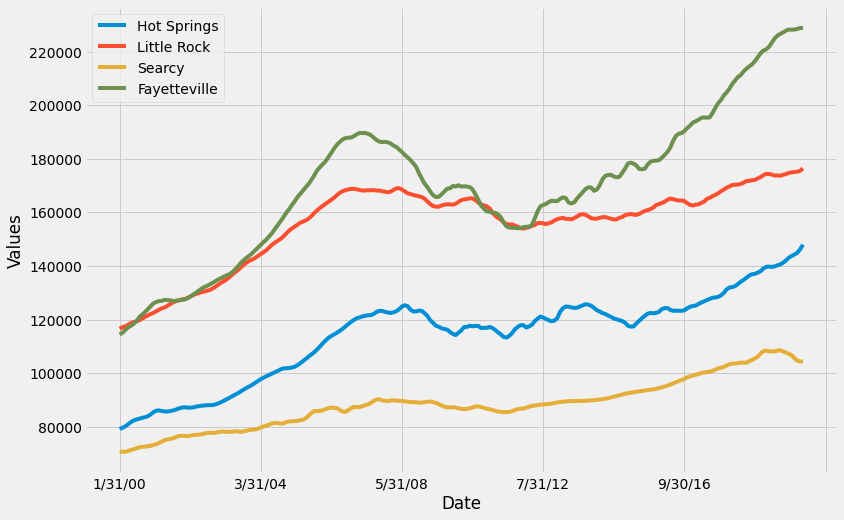

In [ ]:
ax = arMeansDF.set_index('Dates').plot(figsize=(12, 8))
ax.set_ylabel('Values')
ax.set_xlabel('Date')

plt.show()

In [ ]:
arMeansDF.describe()

,Hot Springs,Little Rock,Searcy,Fayetteville
count,243.000000,243.000000,243.000000,243.000000
mean,114383.674897,155816.165295,88522.199588,169948.043896
std,16414.546288,15320.987317,9309.364052,27453.539756
min,79269.000000,116643.083333,70607.000000,114491.666667
25%,102058.750000,153601.000000,82071.250000,154448.333333
50%,118841.000000,159856.000000,88104.500000,169522.666667
75%,123848.250000,166213.708333,92854.750000,186423.000000
max,147991.500000,176446.250000,108612.500000,228840.666667


In [ ]:
zillowPivotDF = pd.read_csv('Zillow Data Pivot.csv')

In [ ]:
zillowPivotDF.fillna(0)

,Dates,Youngstown,Garland,Town Of Fine,Earlington,Elkhorn City,Raccoon,Mangum,Lester,Kansas City,...,Ocala.9,Wichita.14,Brunswick.5,Kenai,Edgewood.2,Bloomfield.3,Cherryville.1,Jacksonville.33,Norwalk.5,Big Clifty
0,1/31/00,11209,15746,23529,14205,18425,16047,19281,16883,19216,...,77150,113638,0.0,0.0,148381,0.0,79700,0.0,0.0,114967
1,2/29/00,11125,15751,23924,14201,18852,16092,19381,16994,19522,...,76716,113719,0.0,0.0,148080,0.0,79671,0.0,0.0,115456
2,3/31/00,11172,15821,24016,14327,19098,16133,19536,17098,19860,...,76852,113817,0.0,0.0,147930,0.0,79482,0.0,0.0,116367
3,4/30/00,11133,16075,24329,14368,19374,16126,19759,17086,20104,...,77065,113727,0.0,0.0,147610,0.0,80106,0.0,0.0,117094
4,5/31/00,11084,16286,24851,14400,19681,16248,19895,17194,20396,...,77653,113792,0.0,0.0,147554,0.0,80767,0.0,0.0,117299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,11/30/19,19888,21700,43057,28113,38748,46287,46606,27150,36908,...,139264,165187,199078.0,238149.0,260662,155327.0,145248,67182.0,232360.0,110623
239,12/31/19,20313,21598,43471,28078,38927,46426,47188,27570,36772,...,140565,165642,199613.0,239542.0,261512,156225.0,146211,67600.0,232801.0,112365
240,1/31/20,20572,21590,43832,28008,39053,46460,47744,27644,36794,...,141369,166538,200165.0,241828.0,261942,156765.0,146951,68244.0,233143.0,112623
241,2/29/20,20821,21514,44111,27840,38893,46228,48059,27825,37051,...,141720,167892,199836.0,243306.0,262560,156939.0,147997,69605.0,233192.0,112666


In [ ]:
avePrices = zillowPivotDF.iloc[[0, -1]].mean()
avePrices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Youngstown          16193.5
Garland             18615.5
Town Of Fine        33875.5
Earlington          20931.0
Elkhorn City        28587.5
                     ...   
Bloomfield.3       156332.0
Cherryville.1      114122.0
Jacksonville.33     70926.0
Norwalk.5          233178.0
Big Clifty         114014.0
Length: 15408, dtype: float64

In [ ]:
avePrices.nlargest(n=30)

New York.147        8221444.0
New York.157        6615471.0
New York.137        5584404.0
New York.141        5526661.0
New York.128        5430684.0
New York.154        4246288.0
Atherton            3976343.5
Aspen               3781087.5
New York.134        3628297.0
New York.132        3443854.0
Beverly Hills.5     3355086.5
Boston.22           3306578.5
New York.127        3109485.0
Palm Beach          3037633.5
Palo Alto.3         2979776.0
Sagaponack          2873926.5
San Francisco.21    2846430.0
New York.131        2713718.0
Los Altos.1         2682402.5
Palo Alto.2         2671128.5
Santa Monica.4      2590457.0
San Francisco.19    2521148.0
Newport Beach.5     2480188.0
Portola Valley      2433348.0
Stanford.2          2392541.0
New York.158        2354900.0
Los Angeles.83      2211752.5
Los Angeles.91      2203202.5
Malibu              2182817.0
New York.146        2182393.0
dtype: float64

In [ ]:
highLowDF = pd.read_csv('High Low Table.csv')

In [ ]:
highLowDF = highLowDF.dropna(axis = 1)

In [ ]:
highLowDF

,Youngstown,Garland,Town Of Fine,Earlington,Elkhorn City,Raccoon,Mangum,Lester,Kansas City,Kimper,...,Warrior,Newaygo,Tarrant,Piedmont.2,Barboursville.2,Ocala.9,Wichita.14,Edgewood.2,Cherryville.1,Big Clifty
0,11209,15746,23529,14205,18425,16047,19281,16883,19216,18827,...,100712,90604,60823,46495,86760,77150,113638,148381,79700,114967
1,21178,21485,44222,27657,38750,46081,48189,27888,37312,43378,...,163234,152026,43497,84372,137734,142162,169281,263152,148544,113061
2,9969,5739,20693,13452,20325,30034,28908,11005,18096,24551,...,62522,61422,-17326,37877,50974,65012,55643,114771,68844,-1906


In [ ]:
#highLowDF = highLowDF.iloc[: , 1:]

In [ ]:
diffVals = highLowDF.iloc[[-1]]

In [ ]:
diffVals

,Youngstown,Garland,Town Of Fine,Earlington,Elkhorn City,Raccoon,Mangum,Lester,Kansas City,Kimper,...,Warrior,Newaygo,Tarrant,Piedmont.2,Barboursville.2,Ocala.9,Wichita.14,Edgewood.2,Cherryville.1,Big Clifty
2,9969,5739,20693,13452,20325,30034,28908,11005,18096,24551,...,62522,61422,-17326,37877,50974,65012,55643,114771,68844,-1906


In [ ]:
diffVals = diffVals.max()

In [ ]:
diffVals

Youngstown         9969
Garland            5739
Town Of Fine      20693
Earlington        13452
Elkhorn City      20325
                  ...  
Ocala.9           65012
Wichita.14        55643
Edgewood.2       114771
Cherryville.1     68844
Big Clifty        -1906
Length: 13963, dtype: int64

In [ ]:
diffVals.nlargest(n=50)

Atherton            5370233
Beverly Hills.5     5095109
Santa Monica.4      3717568
Los Angeles.83      3604161
San Francisco.21    3478342
Boston.22           3352543
Aspen               3309093
Palm Beach          3263447
Palo Alto.2         3145517
San Francisco.19    3136800
Sagaponack          2988139
Malibu              2931192
New York.137        2929078
Beverly Hills.4     2901745
Los Angeles.89      2748241
Portola Valley      2686118
Los Altos.1         2668037
Los Angeles.91      2642151
West Hollywood      2597003
Newport Beach.2     2550897
Ross                2446096
Los Angeles.87      2431356
Los Angeles.90      2396981
Newport Beach.4     2390747
Manhattan Beach     2385588
Santa Monica        2373014
Los Altos           2359124
San Francisco.11    2297776
San Francisco.20    2290761
San Francisco.16    2286756
Amagansett          2285556
Beverly Hills.2     2284564
New York.120        2253429
Burlingame          2243556
Newport Beach.5     2203694
Montecito           

In [ ]:
#zillowPivotDF = zillowPivotDF.dropna()

In [ ]:
df1 = pd.DataFrame()
df1['Dates'] = dates
df1['y'] = zillowPivotDF['Atherton']

In [ ]:
df1 = df1.rename(index=str, columns={"Dates": "ds"})

In [ ]:
zip_model = Prophet(interval_width=0.95)
zip_model.fit(df1)

21:09:09 - cmdstanpy - INFO - Chain [1] start processing
21:09:09 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates = zip_model.make_future_dataframe(periods=31, freq='W')
future_dates.tail()
#future_dates

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast = zip_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,6.888862e+06,6.730735e+06,7.044453e+06
270,2020-10-11,6.953511e+06,6.803613e+06,7.108322e+06
271,2020-10-18,6.990718e+06,6.846924e+06,7.141252e+06
272,2020-10-25,6.958404e+06,6.807290e+06,7.114921e+06
273,2020-11-01,6.886277e+06,6.736972e+06,7.040434e+06


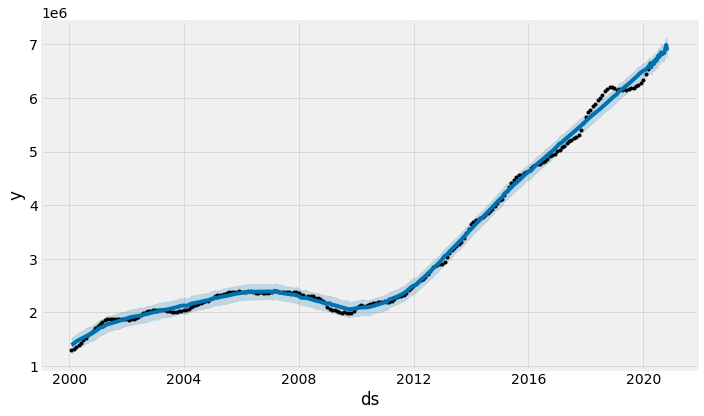

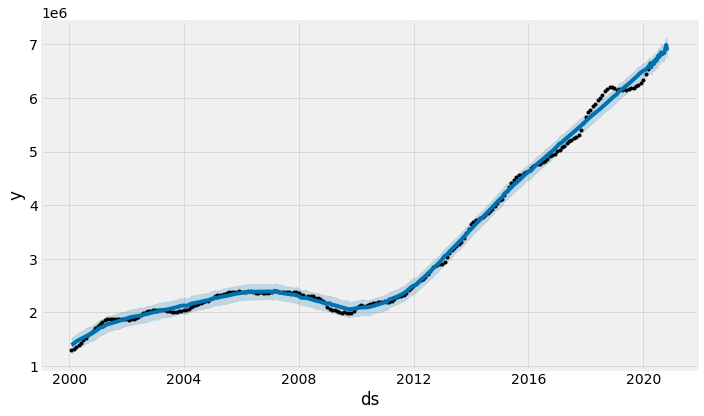

In [ ]:
zip_model.plot(forecast, uncertainty=True)

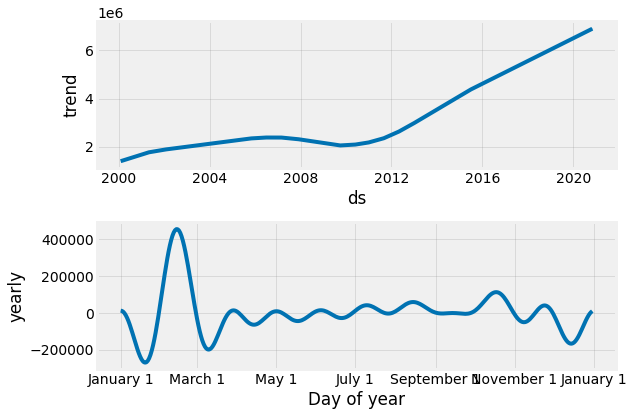

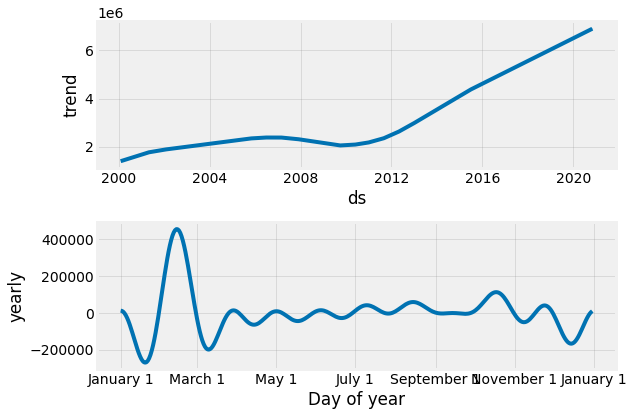

In [ ]:
zip_model.plot_components(forecast)

In [ ]:
df2 = pd.DataFrame()
df2['ds'] = dates
df2['y'] = zillowPivotDF['Beverly Hills.5']

In [ ]:
zip_model2 = Prophet(interval_width=0.95)
zip_model2.fit(df2)

21:09:28 - cmdstanpy - INFO - Chain [1] start processing
21:09:28 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates2 = zip_model2.make_future_dataframe(periods=31, freq='W')
future_dates2.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast2 = zip_model2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,6.066933e+06,5.972475e+06,6.166126e+06
270,2020-10-11,6.058486e+06,5.961717e+06,6.151103e+06
271,2020-10-18,6.105475e+06,6.005940e+06,6.205442e+06
272,2020-10-25,6.149034e+06,6.050724e+06,6.249300e+06
273,2020-11-01,6.131790e+06,6.034639e+06,6.222481e+06


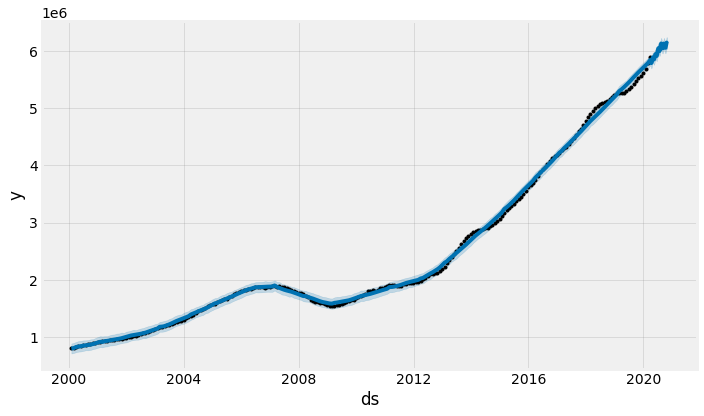

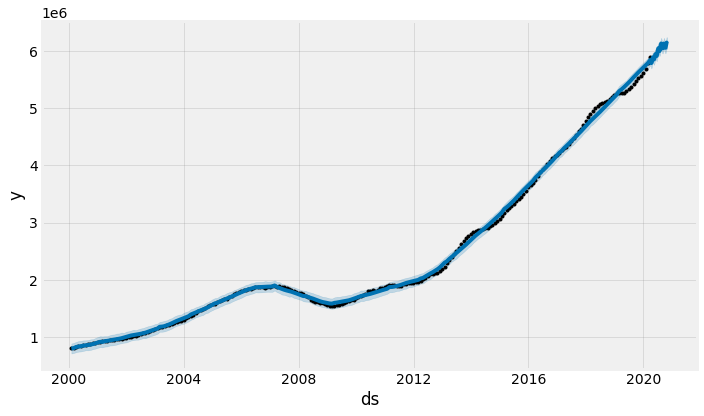

In [ ]:
zip_model2.plot(forecast2, uncertainty=True)

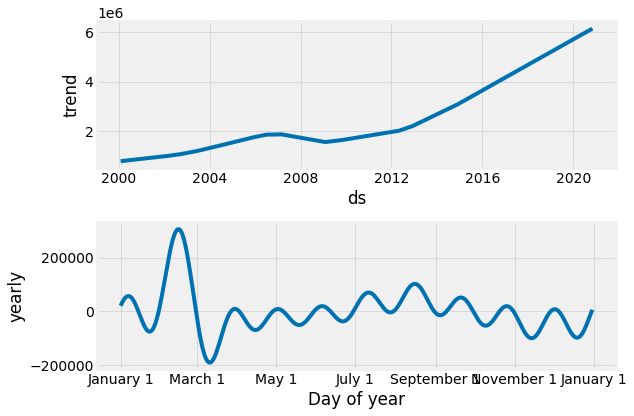

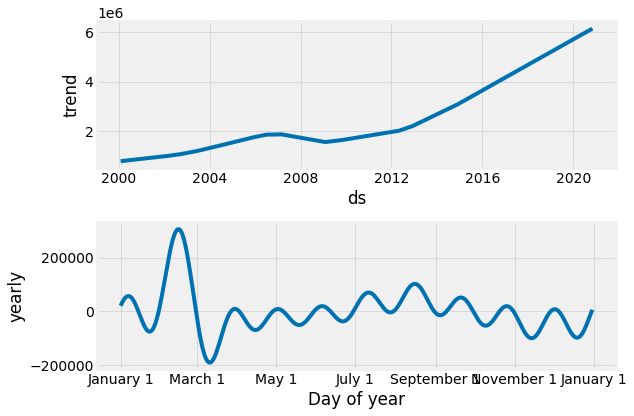

In [ ]:
zip_model2.plot_components(forecast2)

In [ ]:
df3 = pd.DataFrame()
df3['ds'] = dates
df3['y'] = zillowPivotDF['Santa Monica.4']

In [ ]:
zip_model3 = Prophet(interval_width=0.95)
zip_model3.fit(df3)

21:09:47 - cmdstanpy - INFO - Chain [1] start processing
21:09:47 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates3 = zip_model3.make_future_dataframe(periods=31, freq='W')
future_dates3.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast3 = zip_model3.predict(future_dates3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.631984e+06,4.551647e+06,4.705169e+06
270,2020-10-11,4.623527e+06,4.532764e+06,4.702833e+06
271,2020-10-18,4.630781e+06,4.551178e+06,4.709627e+06
272,2020-10-25,4.653816e+06,4.571212e+06,4.733534e+06
273,2020-11-01,4.670933e+06,4.584298e+06,4.746670e+06


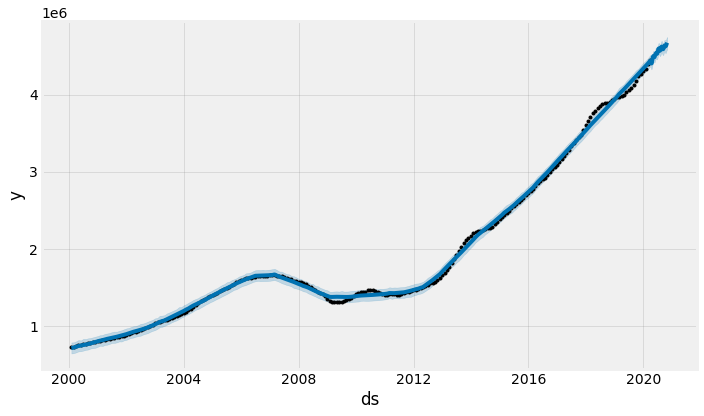

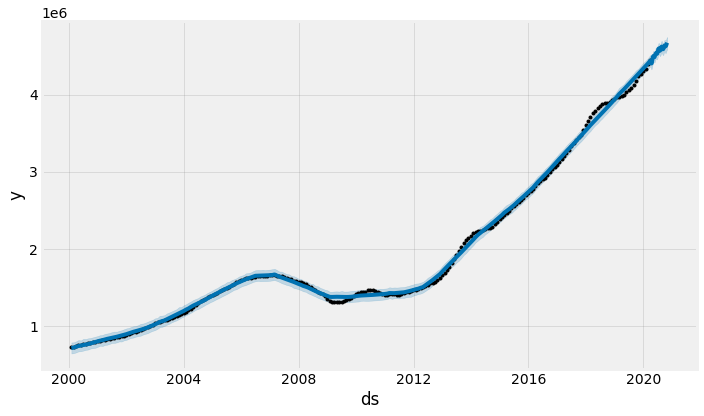

In [ ]:
zip_model3.plot(forecast3, uncertainty=True)

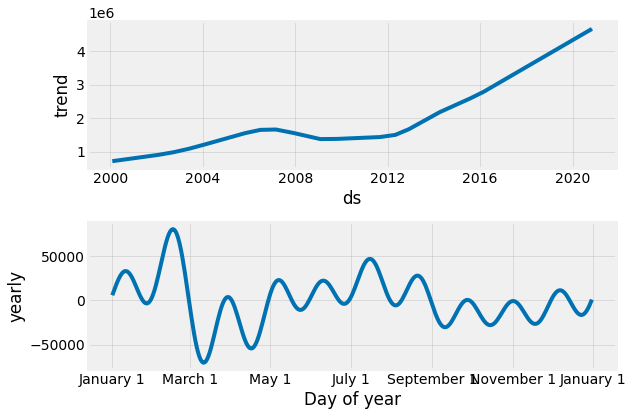

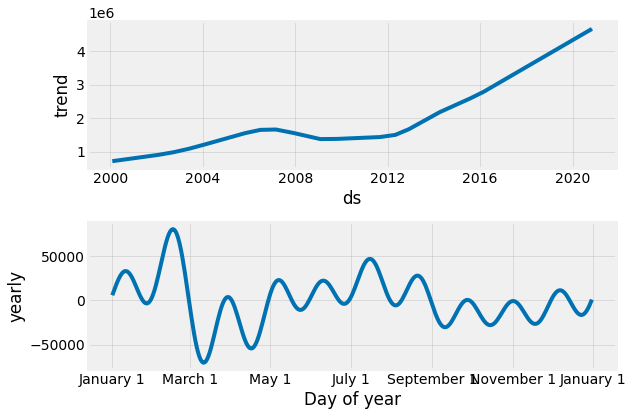

In [ ]:
zip_model3.plot_components(forecast3)

In [ ]:
df4 = pd.DataFrame()
df4['ds'] = dates
df4['y'] = zillowPivotDF['Los Angeles.83']

In [ ]:
zip_model4 = Prophet(interval_width=0.95)
zip_model4.fit(df4)

21:10:15 - cmdstanpy - INFO - Chain [1] start processing
21:10:15 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates4 = zip_model4.make_future_dataframe(periods=31, freq='W')
future_dates4.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast4 = zip_model4.predict(future_dates4)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.227856e+06,4.168251e+06,4.286508e+06
270,2020-10-11,4.218482e+06,4.152935e+06,4.280186e+06
271,2020-10-18,4.208771e+06,4.148542e+06,4.280680e+06
272,2020-10-25,4.227095e+06,4.167675e+06,4.289093e+06
273,2020-11-01,4.266476e+06,4.202410e+06,4.334364e+06


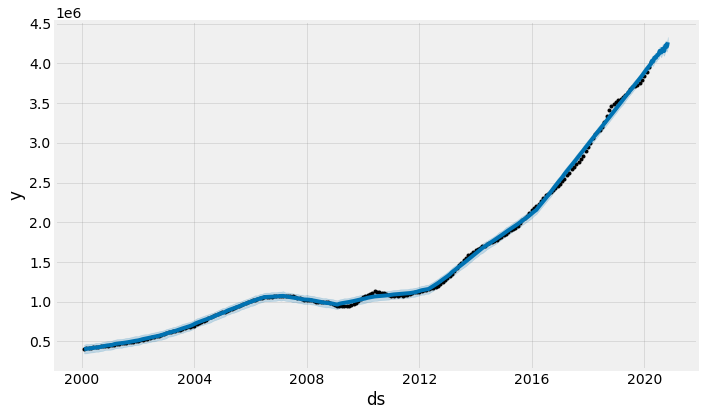

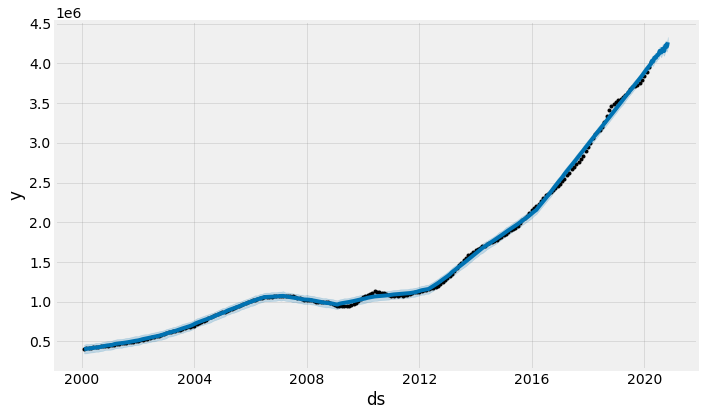

In [ ]:
zip_model4.plot(forecast4, uncertainty=True)

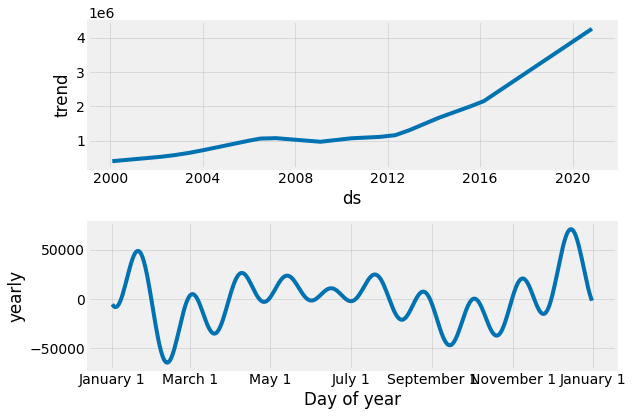

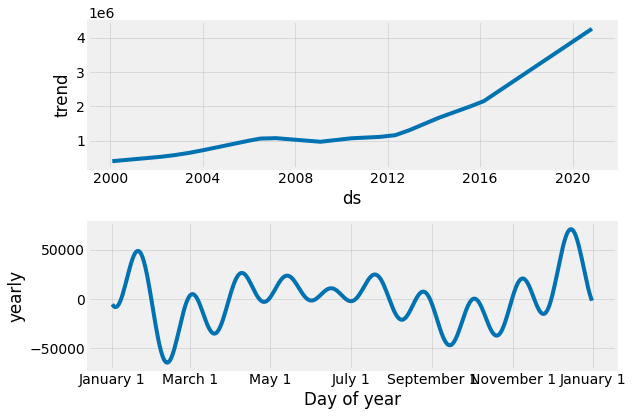

In [ ]:
zip_model4.plot_components(forecast4)

In [ ]:
df5 = pd.DataFrame()
df5['ds'] = dates
df5['y'] = zillowPivotDF['San Francisco.21']

In [ ]:
zip_model5 = Prophet(interval_width=0.95)
zip_model5.fit(df5)

21:13:16 - cmdstanpy - INFO - Chain [1] start processing
21:13:16 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates5 = zip_model5.make_future_dataframe(periods=31, freq='W')
future_dates5.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast5 = zip_model5.predict(future_dates5)
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.745722e+06,4.579319e+06,4.920758e+06
270,2020-10-11,4.743947e+06,4.570166e+06,4.913629e+06
271,2020-10-18,4.743526e+06,4.580320e+06,4.907006e+06
272,2020-10-25,4.752224e+06,4.577790e+06,4.919208e+06
273,2020-11-01,4.774412e+06,4.600500e+06,4.946890e+06


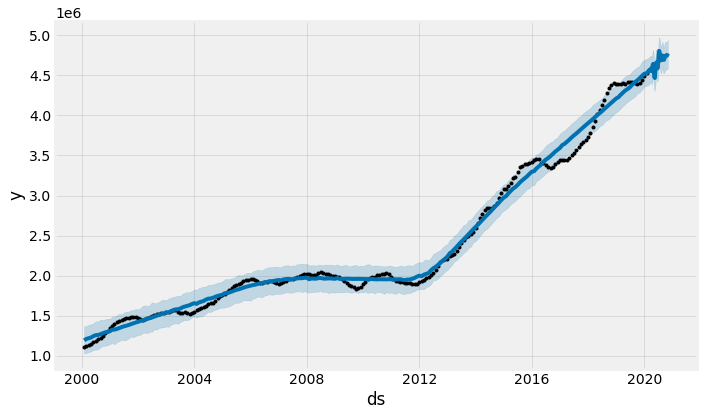

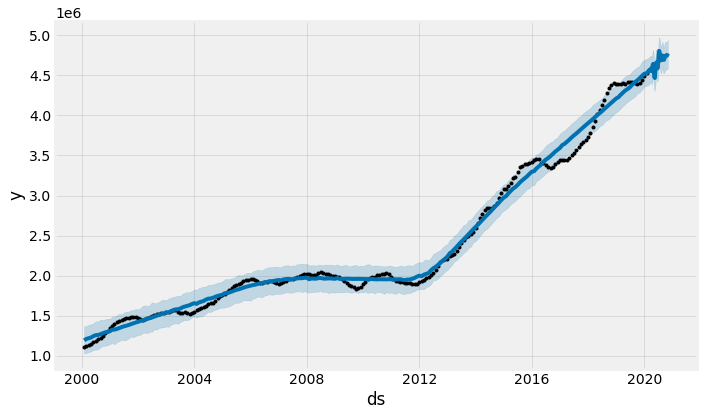

In [ ]:
zip_model5.plot(forecast5, uncertainty=True)

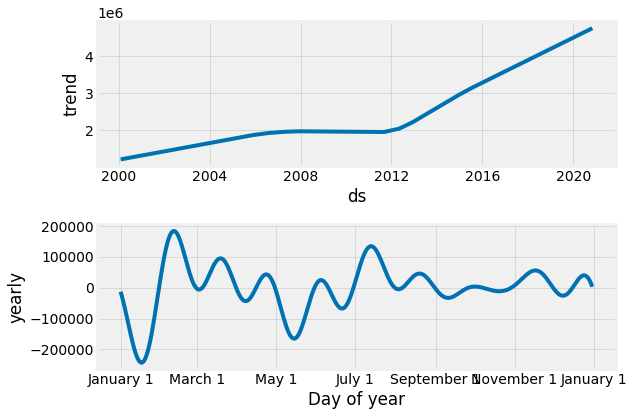

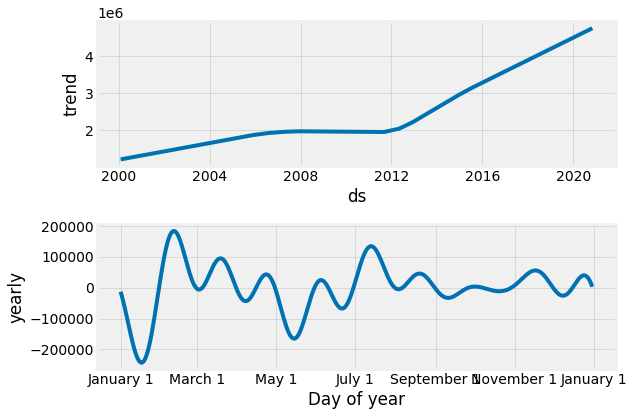

In [ ]:
zip_model5.plot_components(forecast5)

In [ ]:
df6 = pd.DataFrame()
df6['ds'] = dates
df6['y'] = zillowPivotDF['Boston.22']

In [ ]:
zip_model6 = Prophet(interval_width=0.95)
zip_model6.fit(df6)

21:13:36 - cmdstanpy - INFO - Chain [1] start processing
21:13:36 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates6 = zip_model6.make_future_dataframe(periods=31, freq='W')
future_dates6.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast6 = zip_model6.predict(future_dates6)
forecast6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,5.096084e+06,5.030202e+06,5.157211e+06
270,2020-10-11,5.032149e+06,4.968912e+06,5.094745e+06
271,2020-10-18,5.038040e+06,4.974261e+06,5.102243e+06
272,2020-10-25,5.107663e+06,5.042258e+06,5.174433e+06
273,2020-11-01,5.151329e+06,5.082870e+06,5.216743e+06


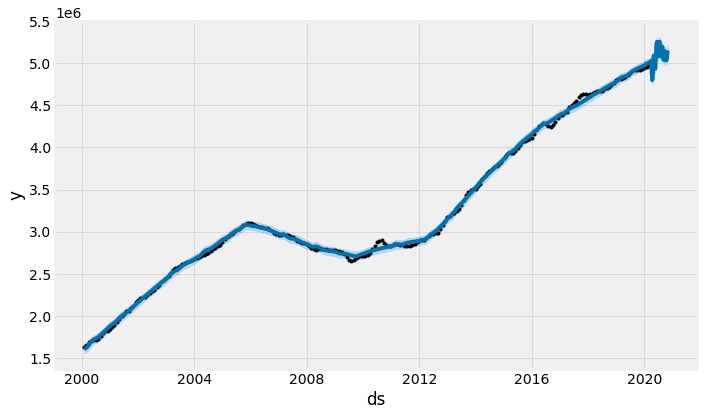

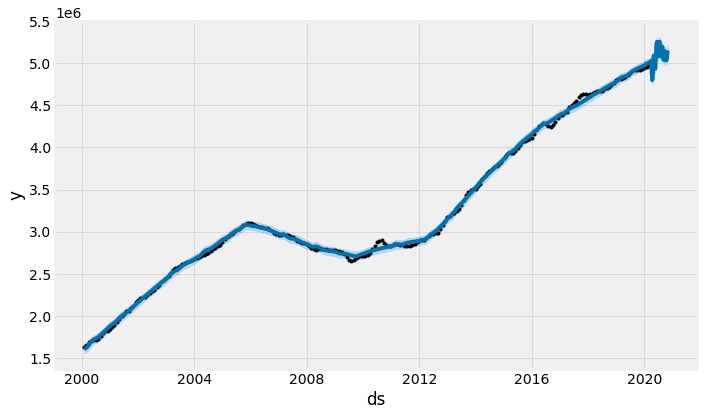

In [ ]:
zip_model6.plot(forecast6, uncertainty=True)

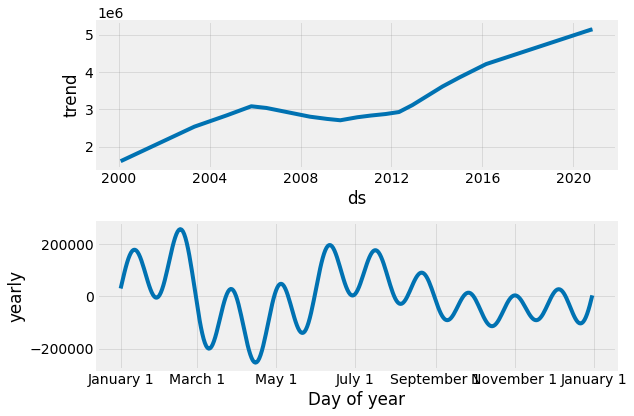

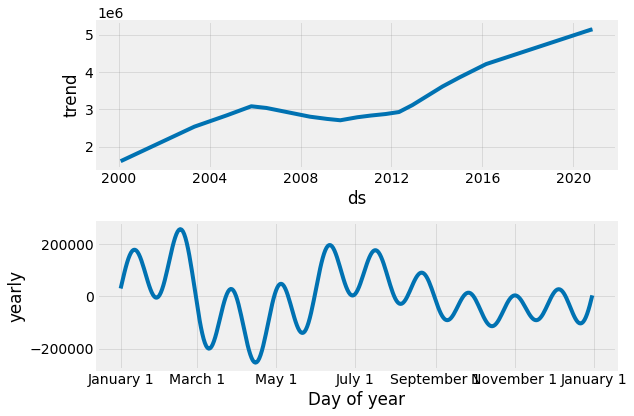

In [ ]:
zip_model6.plot_components(forecast6)

In [ ]:
df7 = pd.DataFrame()
df7['ds'] = dates
df7['y'] = zillowPivotDF['Aspen']

In [ ]:
zip_model7 = Prophet(interval_width=0.95)
zip_model7.fit(df7)

21:13:56 - cmdstanpy - INFO - Chain [1] start processing
21:13:56 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates7 = zip_model7.make_future_dataframe(periods=31, freq='W')
future_dates7.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast7 = zip_model7.predict(future_dates7)
forecast7[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,5.694999e+06,5.625804e+06,5.760731e+06
270,2020-10-11,5.713119e+06,5.640621e+06,5.780672e+06
271,2020-10-18,5.802728e+06,5.733489e+06,5.874389e+06
272,2020-10-25,5.829498e+06,5.756320e+06,5.906772e+06
273,2020-11-01,5.733059e+06,5.652490e+06,5.811706e+06


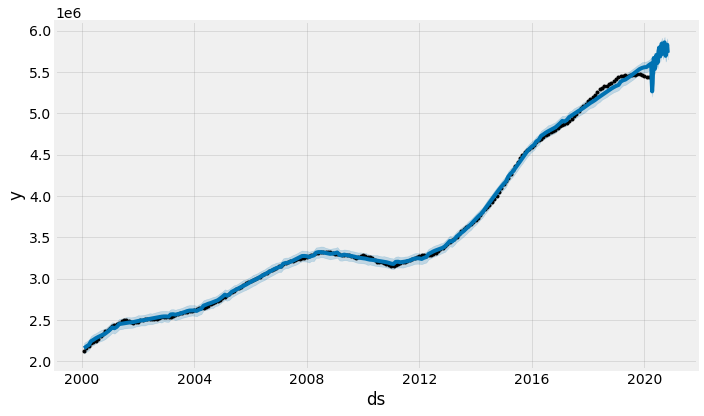

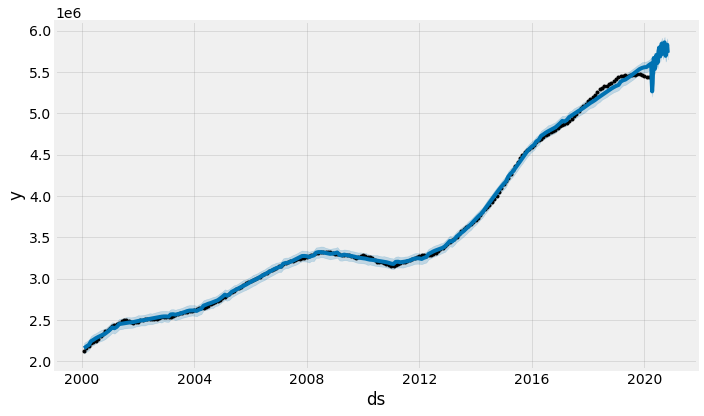

In [ ]:
zip_model7.plot(forecast7, uncertainty=True)

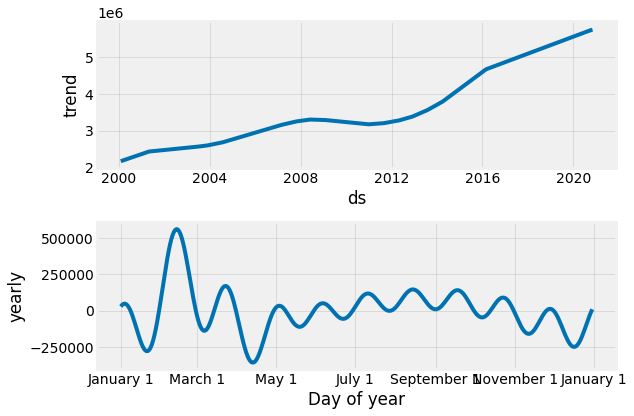

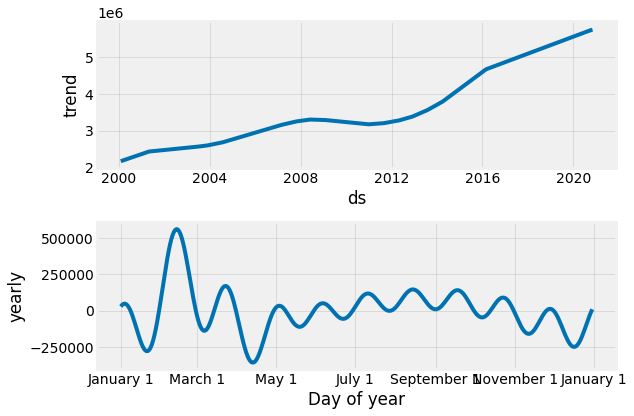

In [ ]:
zip_model7.plot_components(forecast7)

In [ ]:
df8 = pd.DataFrame()
df8['ds'] = dates
df8['y'] = zillowPivotDF['Palm Beach']

In [ ]:
zip_model8 = Prophet(interval_width=0.95)
zip_model8.fit(df8)

21:14:31 - cmdstanpy - INFO - Chain [1] start processing
21:14:32 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates8 = zip_model2.make_future_dataframe(periods=31, freq='W')
future_dates8.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast8 = zip_model8.predict(future_dates8)
forecast8[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.812656e+06,4.728698e+06,4.903762e+06
270,2020-10-11,4.793834e+06,4.709415e+06,4.892458e+06
271,2020-10-18,4.786158e+06,4.693636e+06,4.886280e+06
272,2020-10-25,4.805117e+06,4.707003e+06,4.908733e+06
273,2020-11-01,4.837612e+06,4.722072e+06,4.944010e+06


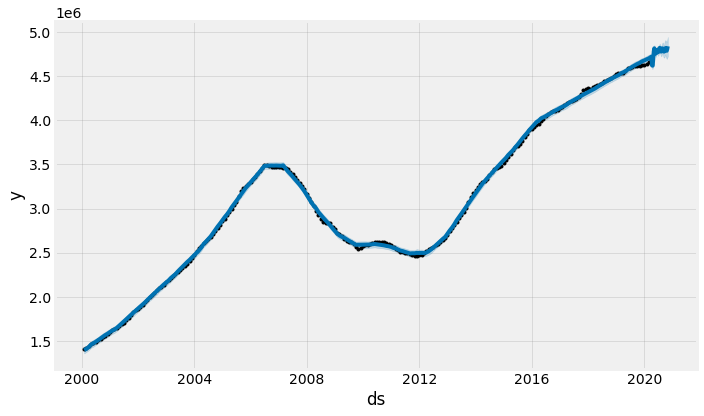

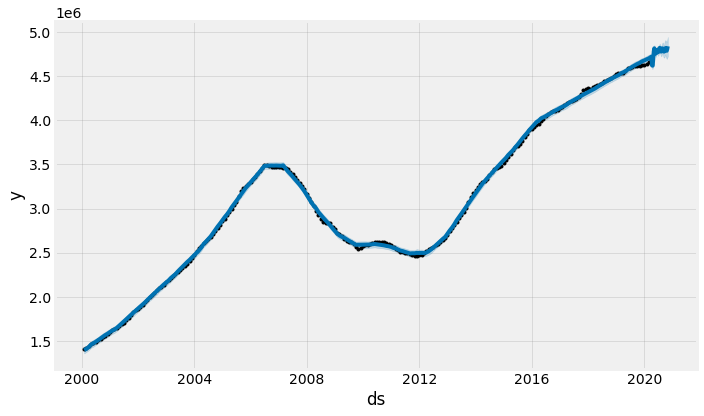

In [ ]:
zip_model8.plot(forecast8, uncertainty=True)

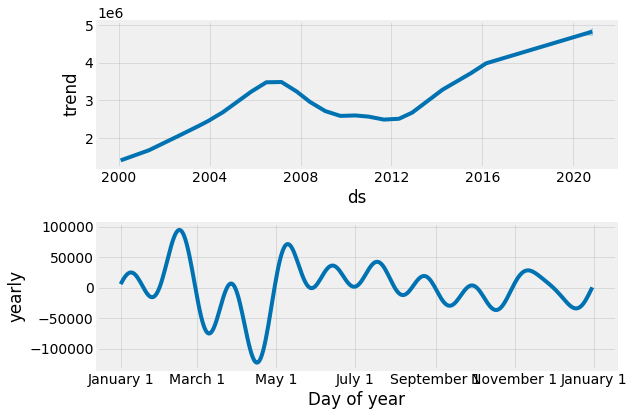

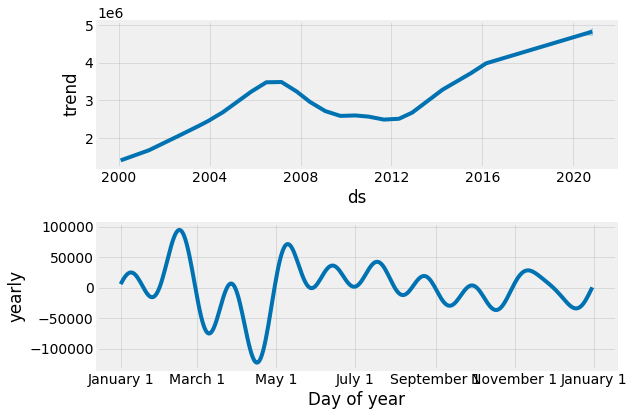

In [ ]:
zip_model8.plot_components(forecast8)

In [ ]:
df9 = pd.DataFrame()
df9['ds'] = dates
df9['y'] = zillowPivotDF['Palo Alto.2']

In [ ]:
zip_model9 = Prophet(interval_width=0.95)
zip_model9.fit(df9)

21:16:58 - cmdstanpy - INFO - Chain [1] start processing
21:16:58 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates9 = zip_model9.make_future_dataframe(periods=31, freq='W')
future_dates9.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast9 = zip_model9.predict(future_dates9)
forecast9[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.506869e+06,4.222573e+06,4.777404e+06
270,2020-10-11,4.593959e+06,4.311964e+06,4.849104e+06
271,2020-10-18,4.920620e+06,4.640504e+06,5.183705e+06
272,2020-10-25,4.980477e+06,4.709251e+06,5.266459e+06
273,2020-11-01,4.594028e+06,4.334669e+06,4.862243e+06


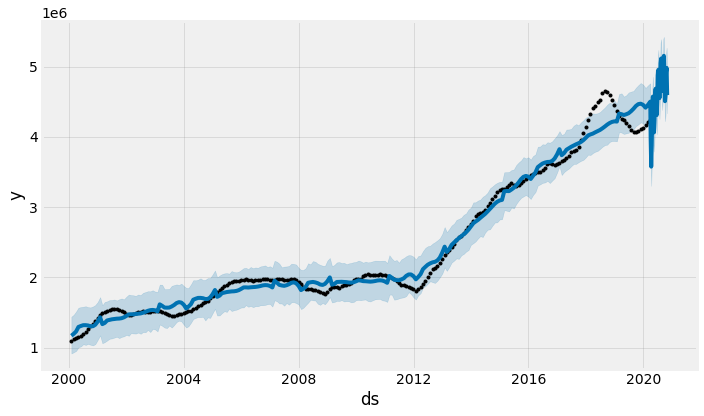

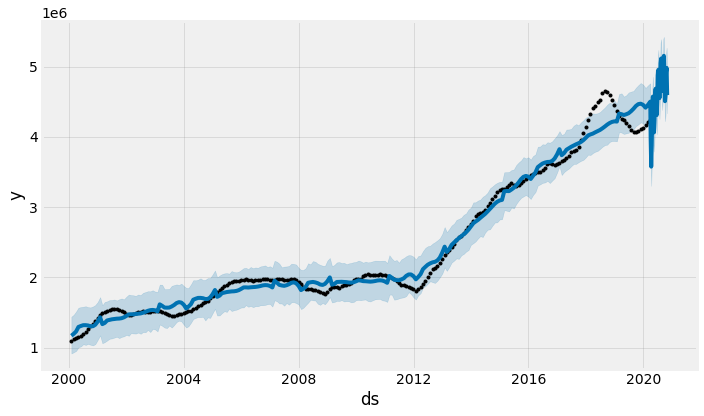

In [ ]:
zip_model9.plot(forecast9, uncertainty=True)

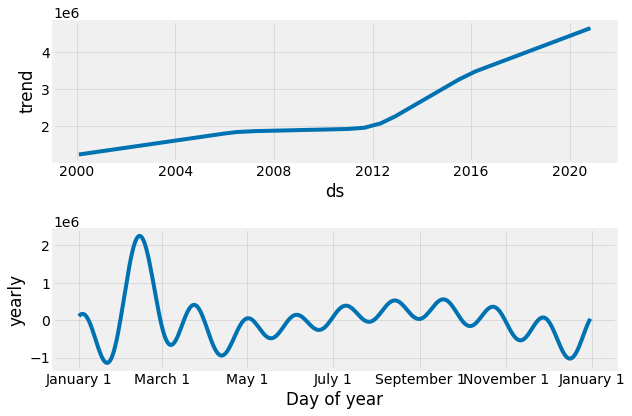

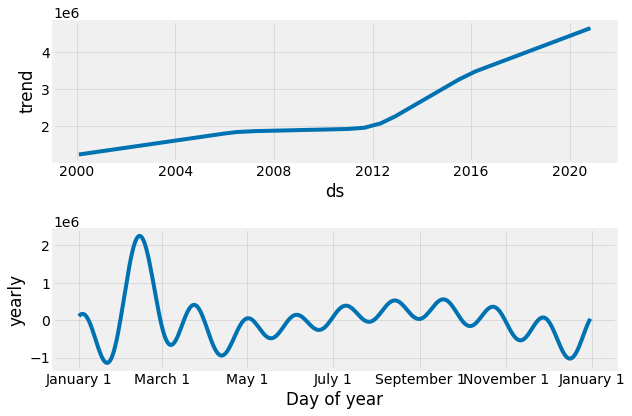

In [ ]:
zip_model9.plot_components(forecast9)

In [ ]:
df10 = pd.DataFrame()
df10['ds'] = dates
df10['y'] = zillowPivotDF['San Francisco.19']

In [ ]:
zip_model10 = Prophet(interval_width=0.95)
zip_model10.fit(df10)

21:17:55 - cmdstanpy - INFO - Chain [1] start processing
21:17:55 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates10 = zip_model10.make_future_dataframe(periods=31, freq='W')
future_dates10.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast10 = zip_model10.predict(future_dates10)
forecast10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.230968e+06,4.116757e+06,4.347288e+06
270,2020-10-11,4.240356e+06,4.122914e+06,4.361903e+06
271,2020-10-18,4.221263e+06,4.111974e+06,4.342298e+06
272,2020-10-25,4.212199e+06,4.100674e+06,4.331178e+06
273,2020-11-01,4.245346e+06,4.119111e+06,4.369742e+06


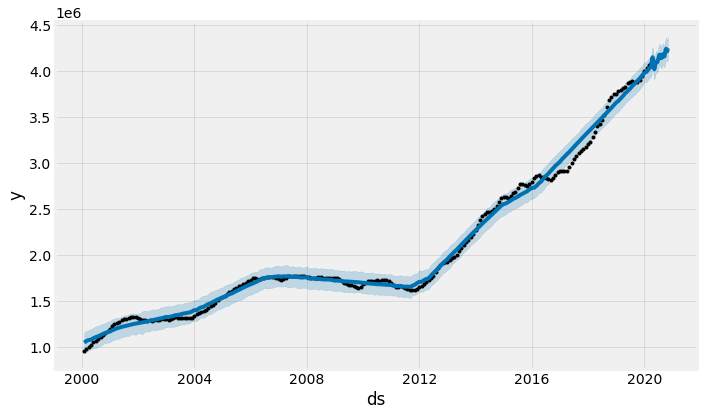

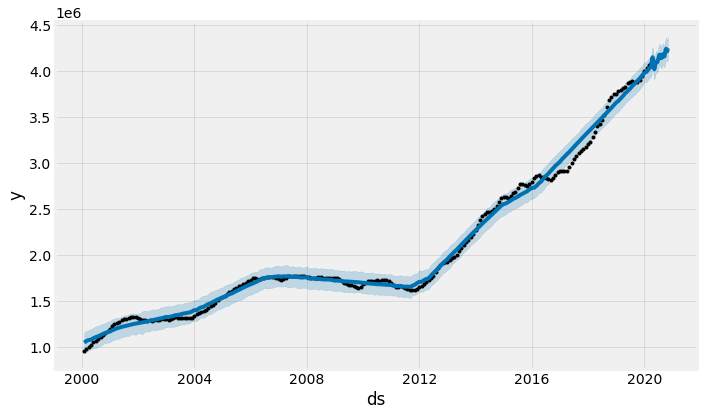

In [ ]:
zip_model10.plot(forecast10, uncertainty=True)

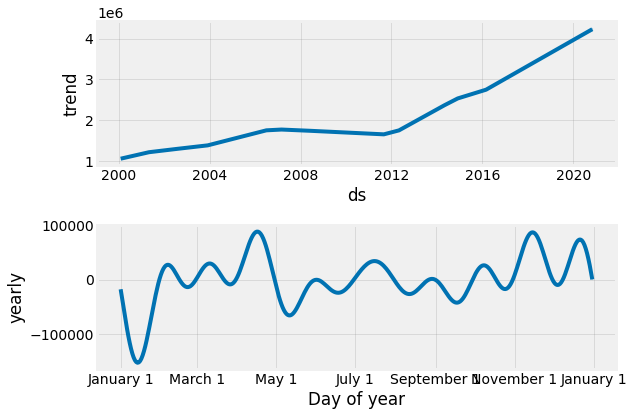

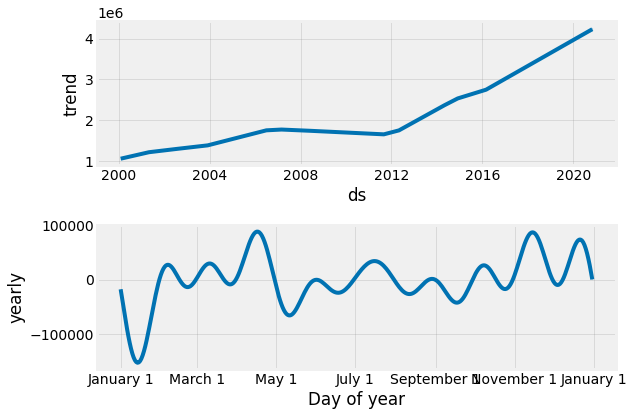

In [ ]:
zip_model10.plot_components(forecast10)

In [ ]:
df11 = pd.DataFrame()
df11['ds'] = dates
df11['y'] = zillowPivotDF['Sagaponack']

In [ ]:
zip_model11 = Prophet(interval_width=0.95)
zip_model11.fit(df11)

21:19:32 - cmdstanpy - INFO - Chain [1] start processing
21:19:33 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates11 = zip_model11.make_future_dataframe(periods=31, freq='W')
future_dates11.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast11 = zip_model11.predict(future_dates11)
forecast11[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.501834e+06,4.387231e+06,4.625376e+06
270,2020-10-11,4.573295e+06,4.445800e+06,4.697069e+06
271,2020-10-18,4.587878e+06,4.465149e+06,4.707441e+06
272,2020-10-25,4.529541e+06,4.400724e+06,4.654109e+06
273,2020-11-01,4.459839e+06,4.346379e+06,4.577477e+06


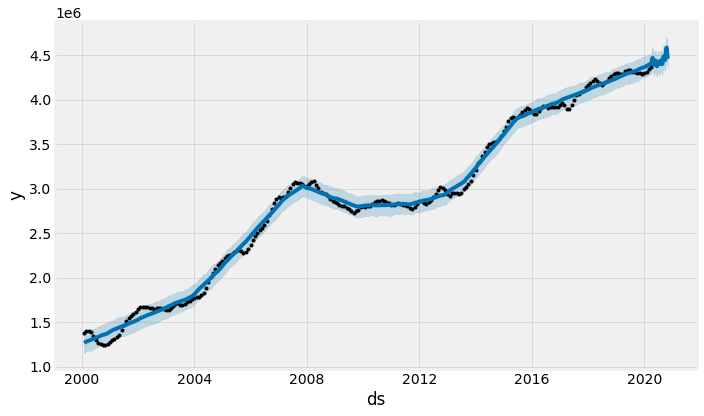

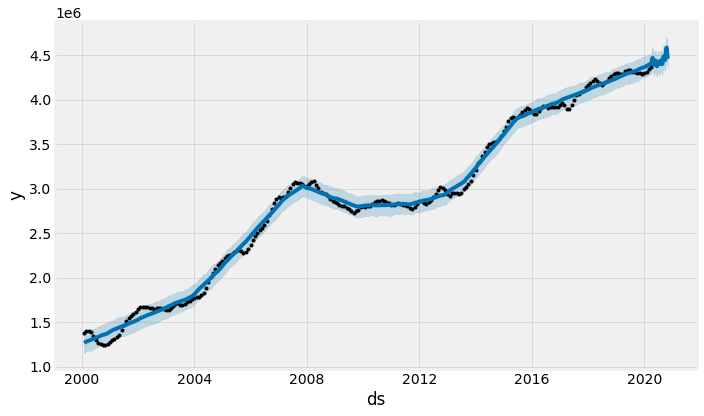

In [ ]:
zip_model11.plot(forecast11, uncertainty=True)

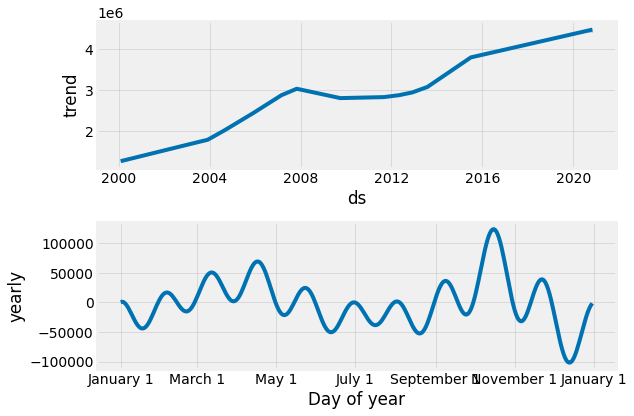

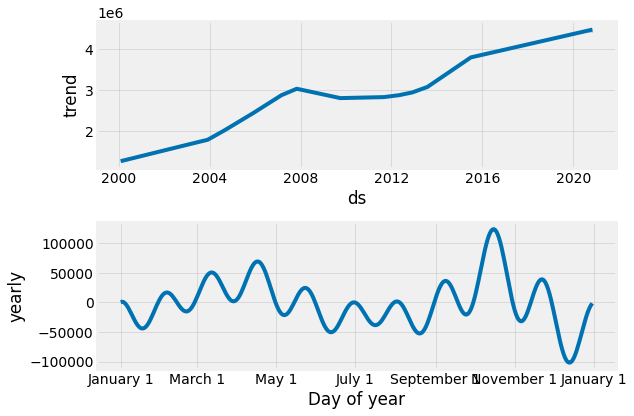

In [ ]:
zip_model11.plot_components(forecast11)

In [ ]:
df12 = pd.DataFrame()
df12['ds'] = dates
df12['y'] = zillowPivotDF['New York.137']

In [ ]:
zip_model12 = Prophet(interval_width=0.95)
zip_model12.fit(df12)

21:20:41 - cmdstanpy - INFO - Chain [1] start processing
21:20:41 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates12 = zip_model12.make_future_dataframe(periods=31, freq='W')
future_dates12.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast12 = zip_model12.predict(future_dates12)
forecast12[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,6.991555e+06,6.624025e+06,7.379537e+06
270,2020-10-11,7.011677e+06,6.659677e+06,7.380002e+06
271,2020-10-18,7.117804e+06,6.740637e+06,7.503147e+06
272,2020-10-25,7.137572e+06,6.777283e+06,7.527575e+06
273,2020-11-01,7.011246e+06,6.646053e+06,7.396161e+06


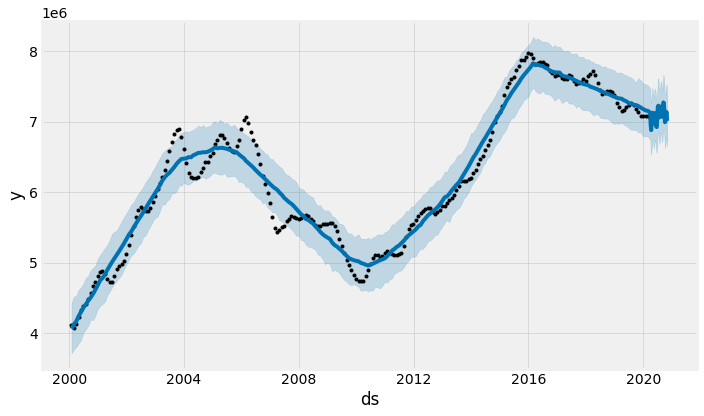

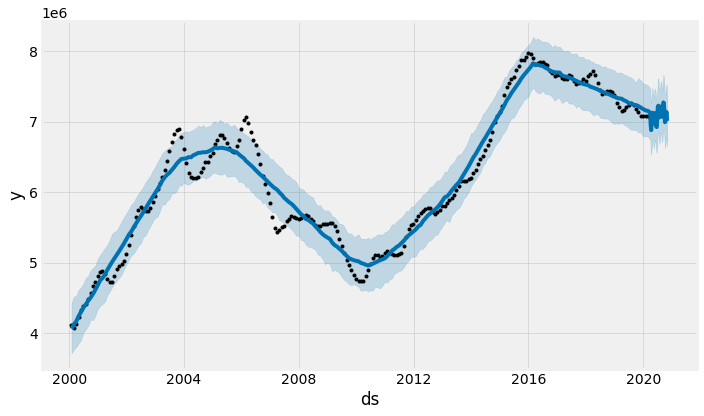

In [ ]:
zip_model12.plot(forecast12, uncertainty=True)

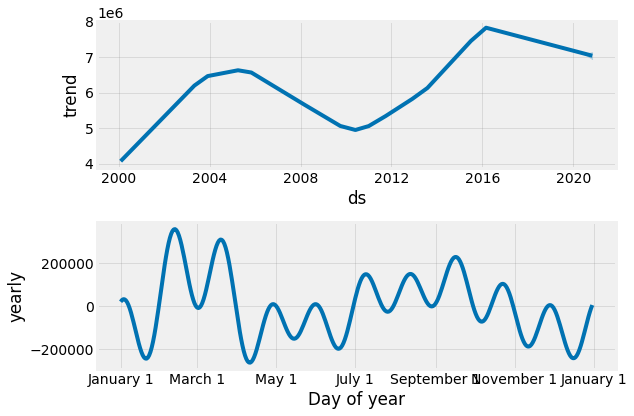

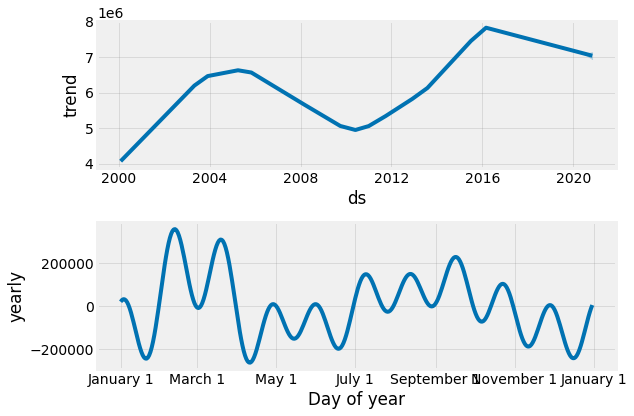

In [ ]:
zip_model12.plot_components(forecast12)

In [ ]:
#POPdf = pd.read_csv('cityPop.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")
POPdf = pd.read_csv('cityPop.csv')

In [ ]:
POPdf

,date,SF Population,Boston Population,LA Population,NY Population
0,12/31/50,1855000,2551000,4046000,12338000
1,12/31/51,1887000,2576000,4246000,12510000
2,12/31/52,1920000,2602000,4457000,12684000
3,12/31/53,1953000,2628000,4678000,12860000
4,12/31/54,1987000,2654000,4911000,13038000
...,...,...,...,...,...
81,12/31/31,3532000,4621000,13325000,20132000
82,12/31/32,3563000,4661000,13440000,20306000
83,12/31/33,3593000,4701000,13554000,20479000
84,12/31/34,3623000,4740000,13667000,20649000


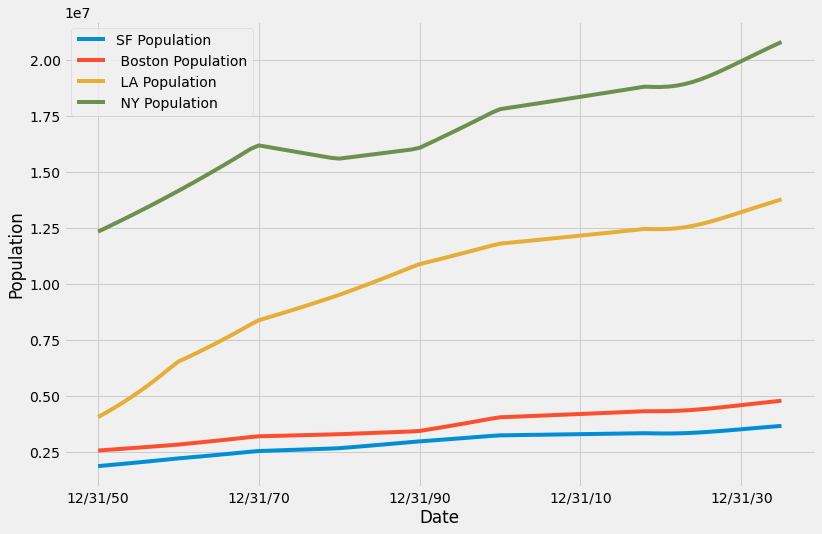

In [ ]:
ax = POPdf.set_index('date').plot(figsize=(12, 8))
ax.set_ylabel('Population')
ax.set_xlabel('Date')
plt.show()

In [ ]:
GDPdf = pd.read_csv('cityGDP.csv')
GDPdf

,Date,SF GDP,Boston GDP,LA GDP,NY GDP
0,1/1/01,240223.331,234693.570,518030.432,992854.3
1,1/1/02,238126.362,237735.492,536607.733,1007577.9
2,1/1/03,246289.538,245407.958,567065.251,1023170.7
3,1/1/04,256414.070,259116.344,600418.066,1040547.3
4,1/1/05,278166.393,272211.311,634786.051,1065797.0
5,1/1/06,296377.341,287146.989,677313.077,1069826.2
6,1/1/07,307604.980,303949.312,701510.899,1071071.5
7,1/1/08,324695.029,311634.603,718064.396,1093923.6
8,1/1/09,309329.272,312593.395,694677.520,1139735.6
9,1/1/10,316779.481,330424.307,721432.807,1111408.9


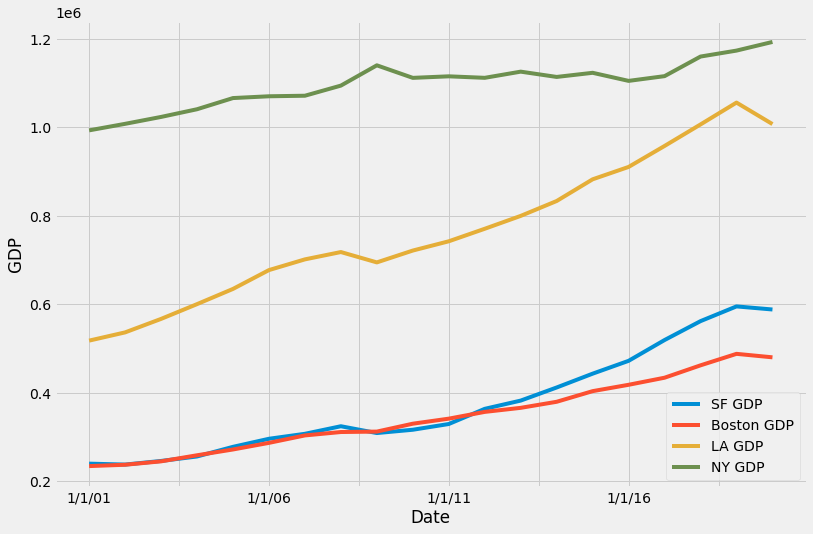

In [ ]:
ax = GDPdf.set_index('Date').plot(figsize=(12, 8))
ax.set_ylabel('GDP')
ax.set_xlabel('Date')
plt.show()

In [ ]:
dfGDPSF = pd.DataFrame()
dfGDPSF['ds'] = dates
dfGDPSF['y'] = GDPdf['SF GDP']

In [ ]:
gdp_model = Prophet(interval_width=0.95)
gdp_model.fit(dfGDPSF)

21:21:20 - cmdstanpy - INFO - Chain [1] start processing
21:21:20 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates = gdp_model.make_future_dataframe(periods=31, freq='W')
future_dates.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast = gdp_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,7.618105e+06,1.365406e+06,1.402940e+07
270,2020-10-11,7.625145e+06,1.378219e+06,1.403918e+07
271,2020-10-18,7.632184e+06,1.362193e+06,1.405765e+07
272,2020-10-25,7.639223e+06,1.359449e+06,1.408281e+07
273,2020-11-01,7.646262e+06,1.374092e+06,1.406995e+07


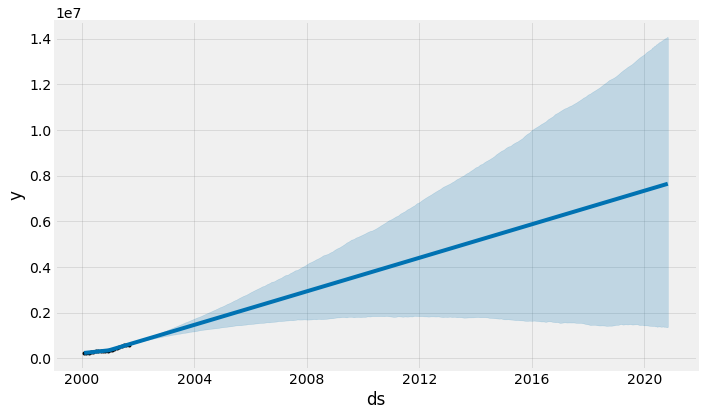

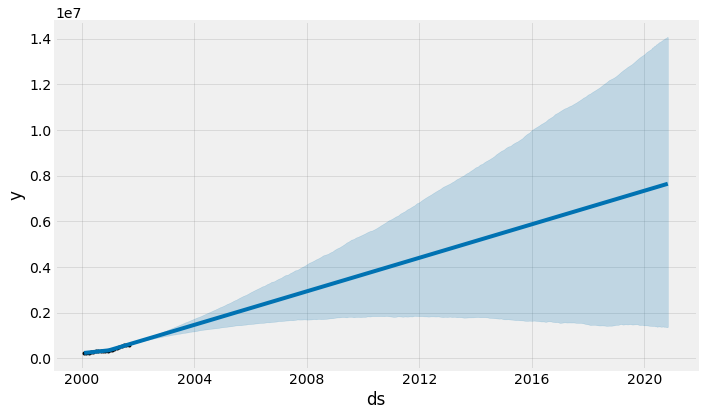

In [ ]:
gdp_model.plot(forecast, uncertainty=True)

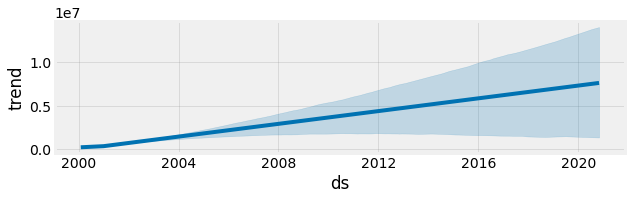

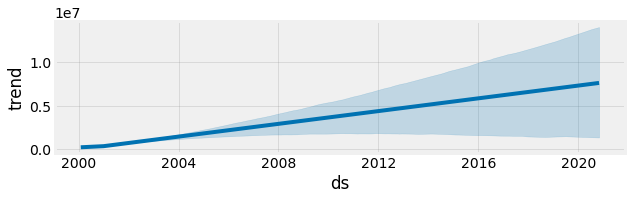

In [ ]:
gdp_model.plot_components(forecast)

In [ ]:
dfGDPLA = pd.DataFrame()
dfGDPLA['ds'] = dates
dfGDPLA['y'] = GDPdf['LA GDP']

In [ ]:
gdp_model = Prophet(interval_width=0.95)
gdp_model.fit(dfGDPLA)

21:22:19 - cmdstanpy - INFO - Chain [1] start processing
21:22:19 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates = gdp_model.make_future_dataframe(periods=31, freq='W')
future_dates.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast = gdp_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,8.307136e+06,5.594979e+06,1.075926e+07
270,2020-10-11,8.314427e+06,5.608447e+06,1.075624e+07
271,2020-10-18,8.321719e+06,5.591247e+06,1.077929e+07
272,2020-10-25,8.329011e+06,5.599766e+06,1.080604e+07
273,2020-11-01,8.336302e+06,5.606999e+06,1.080428e+07


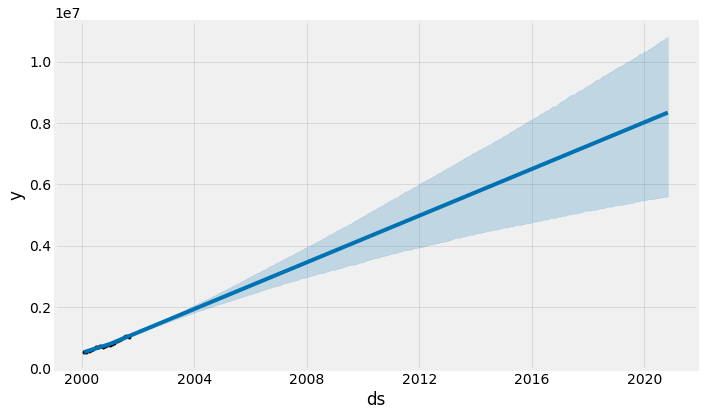

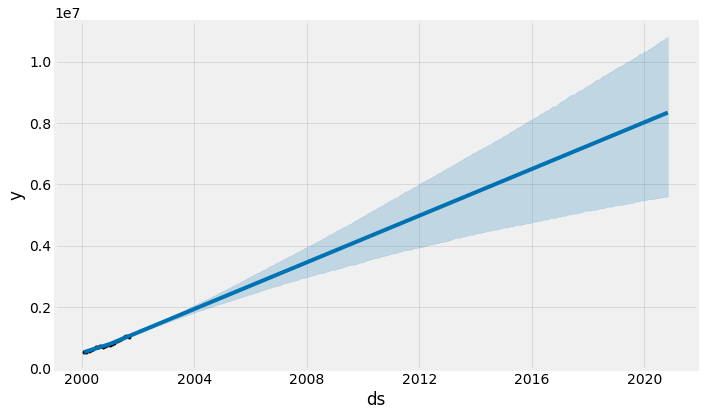

In [ ]:
gdp_model.plot(forecast, uncertainty=True)

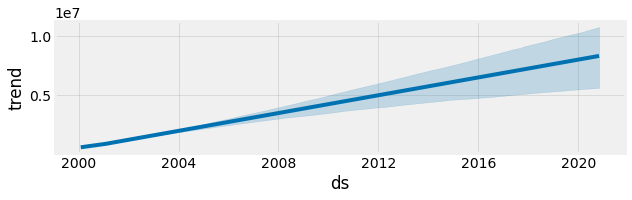

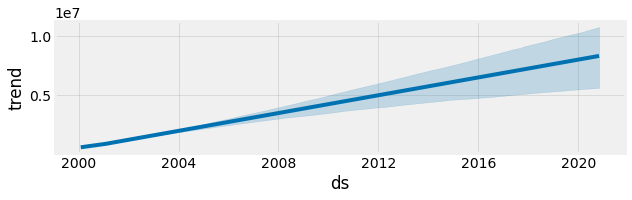

In [ ]:
gdp_model.plot_components(forecast)

In [ ]:
dfGDPNY = pd.DataFrame()
dfGDPNY['ds'] = dates
dfGDPNY['y'] = GDPdf['NY GDP']

In [ ]:
gdp_model = Prophet(interval_width=0.95)
gdp_model.fit(dfGDPNY)

21:22:40 - cmdstanpy - INFO - Chain [1] start processing
21:22:40 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates = gdp_model.make_future_dataframe(periods=31, freq='W')
future_dates.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast = gdp_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,5.208708e+06,-6.402520e+06,1.582263e+07
270,2020-10-11,5.212744e+06,-6.404235e+06,1.583328e+07
271,2020-10-18,5.216781e+06,-6.421243e+06,1.586926e+07
272,2020-10-25,5.220817e+06,-6.440749e+06,1.588068e+07
273,2020-11-01,5.224853e+06,-6.457775e+06,1.590157e+07


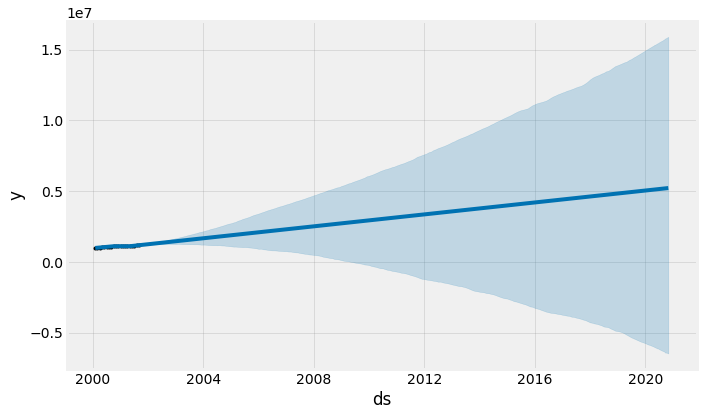

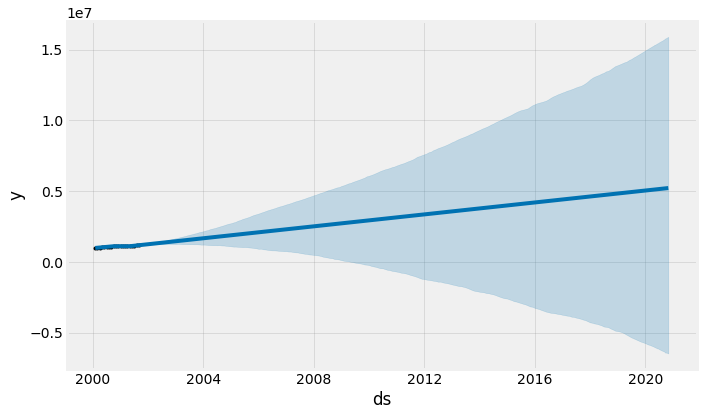

In [ ]:
gdp_model.plot(forecast, uncertainty=True)

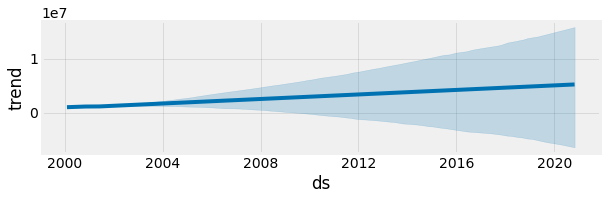

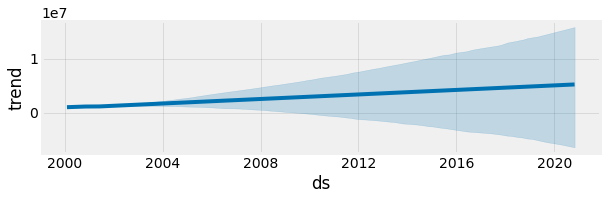

In [ ]:
gdp_model.plot_components(forecast)

In [ ]:
dfGDPBos = pd.DataFrame()
dfGDPBos['ds'] = dates
dfGDPBos['y'] = GDPdf['Boston GDP']

In [ ]:
gdp_model = Prophet(interval_width=0.95)
gdp_model.fit(dfGDPBos)

21:25:00 - cmdstanpy - INFO - Chain [1] start processing
21:25:00 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future_dates = gdp_model.make_future_dataframe(periods=31, freq='W')
future_dates.tail()

,ds
269,2020-10-04
270,2020-10-11
271,2020-10-18
272,2020-10-25
273,2020-11-01


In [ ]:
forecast = gdp_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-04,4.527292e+06,2.598750e+06,6.595432e+06
270,2020-10-11,4.531343e+06,2.599623e+06,6.599293e+06
271,2020-10-18,4.535394e+06,2.597154e+06,6.615475e+06
272,2020-10-25,4.539445e+06,2.597245e+06,6.617490e+06
273,2020-11-01,4.543496e+06,2.598349e+06,6.626544e+06


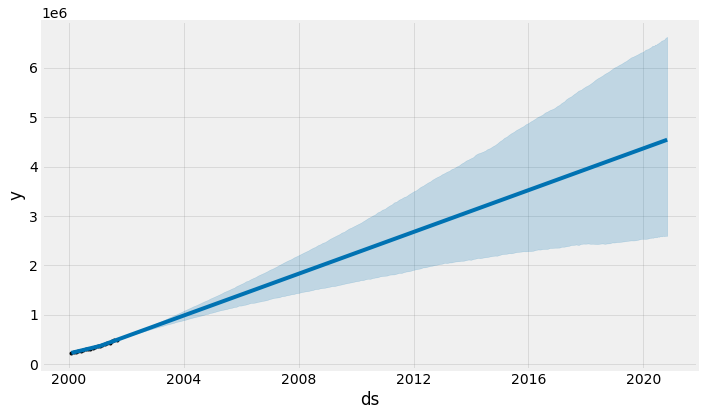

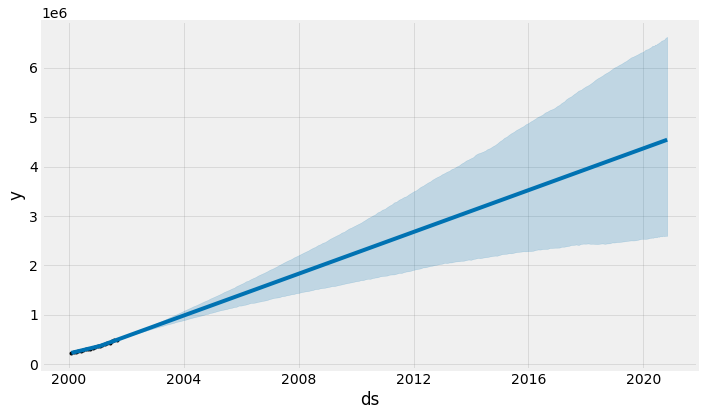

In [ ]:
gdp_model.plot(forecast, uncertainty=True)

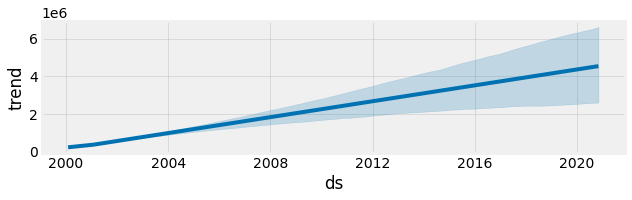

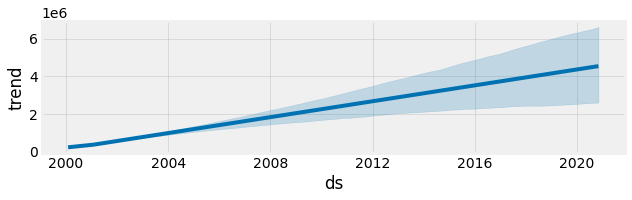

In [ ]:
gdp_model.plot_components(forecast)